In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
rds_connection_string = "postgres:postgres@localhost:5432/COVID_df"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [3]:
file = pd.read_csv('./CSV/owid-covid-data.csv')

In [4]:
file.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [5]:
file.keys()

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'],
      dtype='object')

In [6]:
file = file[['iso_code', 'location', 'date', 'total_cases', 'total_deaths','total_cases_per_million','total_deaths_per_million', 'cvd_death_rate']]

In [7]:
file.head()

,iso_code,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,cvd_death_rate
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,597.029
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,597.029
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,597.029
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,597.029
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,597.029


In [8]:
recent_data_df = file.loc[file['date'] == '2020-06-14']

In [9]:
recent_data_df

,iso_code,location,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,cvd_death_rate
156,AFG,Afghanistan,2020-06-14,24102.0,451.0,619.138,11.585,597.029
254,ALB,Albania,2020-06-14,1464.0,36.0,508.722,12.510,304.195
416,DZA,Algeria,2020-06-14,10810.0,760.0,246.516,17.331,278.364
509,AND,Andorra,2020-06-14,853.0,51.0,11039.928,660.066,109.135
594,AGO,Angola,2020-06-14,138.0,6.0,4.199,0.183,276.045
...,...,...,...,...,...,...,...,...
23341,ESH,Western Sahara,2020-06-14,23.0,1.0,38.505,1.674,NaN
23407,YEM,Yemen,2020-06-14,705.0,160.0,23.637,5.364,495.003
23495,ZMB,Zambia,2020-06-14,1357.0,10.0,73.814,0.544,234.499
23581,ZWE,Zimbabwe,2020-06-14,356.0,4.0,23.952,0.269,307.846


In [10]:
recent_data_df.rename(columns={'iso_code':'iso_a3', 'location':'country'}, inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
recent_data_df

,iso_a3,country,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,cvd_death_rate
156,AFG,Afghanistan,2020-06-14,24102.0,451.0,619.138,11.585,597.029
254,ALB,Albania,2020-06-14,1464.0,36.0,508.722,12.510,304.195
416,DZA,Algeria,2020-06-14,10810.0,760.0,246.516,17.331,278.364
509,AND,Andorra,2020-06-14,853.0,51.0,11039.928,660.066,109.135
594,AGO,Angola,2020-06-14,138.0,6.0,4.199,0.183,276.045
...,...,...,...,...,...,...,...,...
23341,ESH,Western Sahara,2020-06-14,23.0,1.0,38.505,1.674,NaN
23407,YEM,Yemen,2020-06-14,705.0,160.0,23.637,5.364,495.003
23495,ZMB,Zambia,2020-06-14,1357.0,10.0,73.814,0.544,234.499
23581,ZWE,Zimbabwe,2020-06-14,356.0,4.0,23.952,0.269,307.846


In [12]:
recent_data_df.to_csv('./CSV/COVID_data_recent.csv', index = False)

### Save to DB update 1

In [13]:
recent_data_df.to_sql(name='covid_countrycode_table', con=engine, if_exists='append', index=False)

In [14]:
happiness = pd.read_csv('./CSV/happiness_w_countrycode.csv')

In [15]:
happiness.head()

,country,ranking,score,social_support,freedom_index,corruption_index,iso_a3,iso_a2,continent,subregion,country_code,continent_code,subregion_code
0,Finland,1,7.769,1.587,0.596,0.393,FIN,FI,Europe,Northern Europe,246,150.0,154.0
1,Denmark,2,7.600,1.573,0.592,0.410,DNK,DK,Europe,Northern Europe,208,150.0,154.0
2,Norway,3,7.554,1.582,0.603,0.341,NOR,NO,Europe,Northern Europe,578,150.0,154.0
3,Iceland,4,7.494,1.624,0.591,0.118,ISL,IS,Europe,Northern Europe,352,150.0,154.0
4,Netherlands,5,7.488,1.522,0.557,0.298,NLD,NL,Europe,Western Europe,528,150.0,155.0


In [16]:
combined_df = recent_data_df.merge(happiness, on='iso_a3')

In [17]:
combined_df

,iso_a3,country_x,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,cvd_death_rate,country_y,ranking,score,social_support,freedom_index,corruption_index,iso_a2,continent,subregion,country_code,continent_code,subregion_code
0,AFG,Afghanistan,2020-06-14,24102.0,451.0,619.138,11.585,597.029,Afghanistan,154,3.203,0.517,0.000,0.025,AF,Asia,Southern Asia,4,142.0,34.0
1,ALB,Albania,2020-06-14,1464.0,36.0,508.722,12.510,304.195,Albania,107,4.719,0.848,0.383,0.027,AL,Europe,Southern Europe,8,150.0,39.0
2,DZA,Algeria,2020-06-14,10810.0,760.0,246.516,17.331,278.364,Algeria,88,5.211,1.160,0.086,0.114,DZ,Africa,Northern Africa,12,2.0,15.0
3,ARG,Argentina,2020-06-14,30282.0,815.0,670.018,18.033,191.032,Argentina,47,6.086,1.432,0.471,0.050,AR,Americas,Latin America and the Caribbean,32,19.0,419.0
4,ARM,Armenia,2020-06-14,16004.0,264.0,5400.856,89.092,341.010,Armenia,116,4.559,1.055,0.283,0.064,AM,Asia,Western Asia,51,142.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,VEN,Venezuela,2020-06-14,2904.0,24.0,102.124,0.844,204.850,Venezuela,108,4.707,1.427,0.154,0.047,VE,Americas,Latin America and the Caribbean,862,19.0,419.0
138,VNM,Vietnam,2020-06-14,334.0,0.0,3.431,0.000,245.465,Vietnam,94,5.175,1.346,0.543,0.073,VN,Asia,South-eastern Asia,704,142.0,35.0
139,YEM,Yemen,2020-06-14,705.0,160.0,23.637,5.364,495.003,Yemen,151,3.380,1.163,0.143,0.077,YE,Asia,Western Asia,887,142.0,145.0
140,ZMB,Zambia,2020-06-14,1357.0,10.0,73.814,0.544,234.499,Zambia,138,4.107,1.058,0.431,0.087,ZM,Africa,Sub-Saharan Africa,894,2.0,202.0


In [18]:
combined_df.set_index('iso_a3')

,country_x,date,total_cases,total_deaths,total_cases_per_million,total_deaths_per_million,cvd_death_rate,country_y,ranking,score,social_support,freedom_index,corruption_index,iso_a2,continent,subregion,country_code,continent_code,subregion_code
iso_a3,,,,,,,,,,,,,,,,,,,
AFG,Afghanistan,2020-06-14,24102.0,451.0,619.138,11.585,597.029,Afghanistan,154,3.203,0.517,0.000,0.025,AF,Asia,Southern Asia,4,142.0,34.0
ALB,Albania,2020-06-14,1464.0,36.0,508.722,12.510,304.195,Albania,107,4.719,0.848,0.383,0.027,AL,Europe,Southern Europe,8,150.0,39.0
DZA,Algeria,2020-06-14,10810.0,760.0,246.516,17.331,278.364,Algeria,88,5.211,1.160,0.086,0.114,DZ,Africa,Northern Africa,12,2.0,15.0
ARG,Argentina,2020-06-14,30282.0,815.0,670.018,18.033,191.032,Argentina,47,6.086,1.432,0.471,0.050,AR,Americas,Latin America and the Caribbean,32,19.0,419.0
ARM,Armenia,2020-06-14,16004.0,264.0,5400.856,89.092,341.010,Armenia,116,4.559,1.055,0.283,0.064,AM,Asia,Western Asia,51,142.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,Venezuela,2020-06-14,2904.0,24.0,102.124,0.844,204.850,Venezuela,108,4.707,1.427,0.154,0.047,VE,Americas,Latin America and the Caribbean,862,19.0,419.0
VNM,Vietnam,2020-06-14,334.0,0.0,3.431,0.000,245.465,Vietnam,94,5.175,1.346,0.543,0.073,VN,Asia,South-eastern Asia,704,142.0,35.0
YEM,Yemen,2020-06-14,705.0,160.0,23.637,5.364,495.003,Yemen,151,3.380,1.163,0.143,0.077,YE,Asia,Western Asia,887,142.0,145.0


In [19]:
clean_df = combined_df.drop(columns = ['cvd_death_rate','country_y', 'date'])

In [20]:
clean_df.rename(columns = {'iso_a3':'Country Code','country_x':'Country', 'total_cases':'Total Cases',\
                 'total_deaths':'Total Deaths', 'total_cases_per_million':'Total Cases Per Million',\
                'total_deaths_per_million':'Total Deaths Per Million', 'ranking':'Happiness Ranking', \
                 'score':'Happiness Score'}, inplace = True)

In [21]:
clean_df

,Country Code,Country,Total Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Happiness Ranking,Happiness Score,social_support,freedom_index,corruption_index,iso_a2,continent,subregion,country_code,continent_code,subregion_code
0,AFG,Afghanistan,24102.0,451.0,619.138,11.585,154,3.203,0.517,0.000,0.025,AF,Asia,Southern Asia,4,142.0,34.0
1,ALB,Albania,1464.0,36.0,508.722,12.510,107,4.719,0.848,0.383,0.027,AL,Europe,Southern Europe,8,150.0,39.0
2,DZA,Algeria,10810.0,760.0,246.516,17.331,88,5.211,1.160,0.086,0.114,DZ,Africa,Northern Africa,12,2.0,15.0
3,ARG,Argentina,30282.0,815.0,670.018,18.033,47,6.086,1.432,0.471,0.050,AR,Americas,Latin America and the Caribbean,32,19.0,419.0
4,ARM,Armenia,16004.0,264.0,5400.856,89.092,116,4.559,1.055,0.283,0.064,AM,Asia,Western Asia,51,142.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,VEN,Venezuela,2904.0,24.0,102.124,0.844,108,4.707,1.427,0.154,0.047,VE,Americas,Latin America and the Caribbean,862,19.0,419.0
138,VNM,Vietnam,334.0,0.0,3.431,0.000,94,5.175,1.346,0.543,0.073,VN,Asia,South-eastern Asia,704,142.0,35.0
139,YEM,Yemen,705.0,160.0,23.637,5.364,151,3.380,1.163,0.143,0.077,YE,Asia,Western Asia,887,142.0,145.0
140,ZMB,Zambia,1357.0,10.0,73.814,0.544,138,4.107,1.058,0.431,0.087,ZM,Africa,Sub-Saharan Africa,894,2.0,202.0


In [22]:
clean_df.set_index('Happiness Ranking', inplace = True)

In [23]:
clean_df.sort_index(ascending = True, inplace = True)

In [24]:
clean_df.keys()

Index(['Country Code', 'Country', 'Total Cases', 'Total Deaths',
       'Total Cases Per Million', 'Total Deaths Per Million',
       'Happiness Score', 'social_support', 'freedom_index',
       'corruption_index', 'iso_a2', 'continent', 'subregion', 'country_code',
       'continent_code', 'subregion_code'],
      dtype='object')

In [25]:
clean_df = clean_df[['Country','Country Code', 'Total Cases', 'Total Deaths',
       'Total Cases Per Million', 'Total Deaths Per Million',
       'Happiness Score']]
     

In [26]:
clean_df

,Country,Country Code,Total Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Happiness Score
Happiness Ranking,,,,,,,
1,Finland,FIN,7087.0,325.0,1279.076,58.657,7.769
2,Denmark,DNK,12139.0,597.0,2095.748,103.070,7.600
3,Norway,NOR,8606.0,242.0,1587.459,44.639,7.554
4,Iceland,ISL,1808.0,10.0,5298.168,29.304,7.494
5,Netherlands,NLD,48640.0,6057.0,2838.655,353.490,7.488
...,...,...,...,...,...,...,...
152,Rwanda,RWA,541.0,2.0,41.769,0.154,3.334
153,Tanzania,TZA,509.0,21.0,8.521,0.352,3.231
154,Afghanistan,AFG,24102.0,451.0,619.138,11.585,3.203


In [27]:
clean_df['Total Cases Per Million'].describe()

count      142.000000
mean      1527.964585
std       2982.104428
min          1.867000
25%         89.278750
50%        392.633000
75%       1747.165500
max      27217.760000
Name: Total Cases Per Million, dtype: float64

In [28]:
clean_df['COVID Rating']  = clean_df['Total Cases Per Million'].rank(method = 'min', pct = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
clean_df

,Country,Country Code,Total Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Happiness Score,COVID Rating
Happiness Ranking,,,,,,,,
1,Finland,FIN,7087.0,325.0,1279.076,58.657,7.769,0.711268
2,Denmark,DNK,12139.0,597.0,2095.748,103.070,7.600,0.781690
3,Norway,NOR,8606.0,242.0,1587.459,44.639,7.554,0.746479
4,Iceland,ISL,1808.0,10.0,5298.168,29.304,7.494,0.929577
5,Netherlands,NLD,48640.0,6057.0,2838.655,353.490,7.488,0.830986
...,...,...,...,...,...,...,...,...
152,Rwanda,RWA,541.0,2.0,41.769,0.154,3.334,0.147887
153,Tanzania,TZA,509.0,21.0,8.521,0.352,3.231,0.049296
154,Afghanistan,AFG,24102.0,451.0,619.138,11.585,3.203,0.598592


In [30]:
clean_df['COVID Rating'] = 10* clean_df['COVID Rating']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
decimals = 2
clean_df['COVID Rating'] = clean_df['COVID Rating'].apply(lambda x: round(x, decimals))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
clean_df

,Country,Country Code,Total Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Happiness Score,COVID Rating
Happiness Ranking,,,,,,,,
1,Finland,FIN,7087.0,325.0,1279.076,58.657,7.769,7.11
2,Denmark,DNK,12139.0,597.0,2095.748,103.070,7.600,7.82
3,Norway,NOR,8606.0,242.0,1587.459,44.639,7.554,7.46
4,Iceland,ISL,1808.0,10.0,5298.168,29.304,7.494,9.30
5,Netherlands,NLD,48640.0,6057.0,2838.655,353.490,7.488,8.31
...,...,...,...,...,...,...,...,...
152,Rwanda,RWA,541.0,2.0,41.769,0.154,3.334,1.48
153,Tanzania,TZA,509.0,21.0,8.521,0.352,3.231,0.49
154,Afghanistan,AFG,24102.0,451.0,619.138,11.585,3.203,5.99


In [33]:
tmp = clean_df.reset_index()

In [34]:
tmp['COVID Rating'].rank()

0      101.0
1      111.0
2      106.0
3      132.0
4      118.0
       ...  
137     21.0
138      7.0
139     85.0
140     74.0
141     44.0
Name: COVID Rating, Length: 142, dtype: float64

In [35]:
tmp['COVID Ranking'] = tmp.sort_values(by=['COVID Rating'], ascending=True) \
               .reset_index() \
               .sort_values('index') \
               .index + 1

In [36]:
tmp

,Happiness Ranking,Country,Country Code,Total Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Happiness Score,COVID Rating,COVID Ranking
0,1,Finland,FIN,7087.0,325.0,1279.076,58.657,7.769,7.11,101
1,2,Denmark,DNK,12139.0,597.0,2095.748,103.070,7.600,7.82,111
2,3,Norway,NOR,8606.0,242.0,1587.459,44.639,7.554,7.46,106
3,4,Iceland,ISL,1808.0,10.0,5298.168,29.304,7.494,9.30,132
4,5,Netherlands,NLD,48640.0,6057.0,2838.655,353.490,7.488,8.31,118
...,...,...,...,...,...,...,...,...,...,...
137,152,Rwanda,RWA,541.0,2.0,41.769,0.154,3.334,1.48,21
138,153,Tanzania,TZA,509.0,21.0,8.521,0.352,3.231,0.49,7
139,154,Afghanistan,AFG,24102.0,451.0,619.138,11.585,3.203,5.99,85
140,155,Central African Republic,CAF,2057.0,7.0,425.901,1.449,3.083,5.21,74


In [37]:
covid_rating_df = tmp.set_index('COVID Ranking')

In [38]:
covid_rating_df.sort_index(ascending = True, inplace = True)

In [39]:
covid_rating_df

,Happiness Ranking,Country,Country Code,Total Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Happiness Score,COVID Rating
COVID Ranking,,,,,,,,,
1,144,Lesotho,LSO,4.0,0.0,1.867,0.000,3.802,0.07
2,105,Laos,LAO,19.0,0.0,2.611,0.000,4.796,0.14
3,94,Vietnam,VNM,334.0,0.0,3.431,0.000,5.175,0.21
4,131,Myanmar,MMR,261.0,6.0,4.797,0.110,4.360,0.28
5,109,Cambodia,KHM,128.0,0.0,7.656,0.000,4.700,0.35
...,...,...,...,...,...,...,...,...,...
138,34,Singapore,SGP,40197.0,26.0,6870.879,4.444,6.262,9.72
139,51,Kuwait,KWT,35466.0,289.0,8304.760,67.673,6.021,9.79
140,26,Chile,CHL,167355.0,3101.0,8754.612,162.218,6.444,9.86


In [40]:
region_df = pd.read_csv('./CSV/region.csv')

In [41]:
region_df.drop(columns = ('country'), inplace = True)

In [42]:
region_df['Country Code'] = region_df['iso_a3']

In [43]:
subregion_df = tmp.merge(region_df, on = 'Country Code')

In [44]:
subregion_df.head()

,Happiness Ranking,Country,Country Code,Total Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Happiness Score,COVID Rating,COVID Ranking,iso_a3,subregion
0,1,Finland,FIN,7087.0,325.0,1279.076,58.657,7.769,7.11,101,FIN,Northern Europe
1,2,Denmark,DNK,12139.0,597.0,2095.748,103.070,7.600,7.82,111,DNK,Northern Europe
2,3,Norway,NOR,8606.0,242.0,1587.459,44.639,7.554,7.46,106,NOR,Northern Europe
3,4,Iceland,ISL,1808.0,10.0,5298.168,29.304,7.494,9.30,132,ISL,Northern Europe
4,5,Netherlands,NLD,48640.0,6057.0,2838.655,353.490,7.488,8.31,118,NLD,Western Europe


In [45]:
subregion_df = subregion_df.set_index('COVID Ranking')

In [46]:
subregion_df.sort_index(ascending = True)

,Happiness Ranking,Country,Country Code,Total Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Happiness Score,COVID Rating,iso_a3,subregion
COVID Ranking,,,,,,,,,,,
1,144,Lesotho,LSO,4.0,0.0,1.867,0.000,3.802,0.07,LSO,Sub-Saharan Africa
2,105,Laos,LAO,19.0,0.0,2.611,0.000,4.796,0.14,LAO,South-eastern Asia
3,94,Vietnam,VNM,334.0,0.0,3.431,0.000,5.175,0.21,VNM,South-eastern Asia
4,131,Myanmar,MMR,261.0,6.0,4.797,0.110,4.360,0.28,MMR,South-eastern Asia
5,109,Cambodia,KHM,128.0,0.0,7.656,0.000,4.700,0.35,KHM,South-eastern Asia
...,...,...,...,...,...,...,...,...,...,...,...
138,34,Singapore,SGP,40197.0,26.0,6870.879,4.444,6.262,9.72,SGP,South-eastern Asia
139,51,Kuwait,KWT,35466.0,289.0,8304.760,67.673,6.021,9.79,KWT,Western Asia
140,26,Chile,CHL,167355.0,3101.0,8754.612,162.218,6.444,9.86,CHL,Latin America and the Caribbean


In [47]:
subregion_df.keys()

Index(['Happiness Ranking', 'Country', 'Country Code', 'Total Cases',
       'Total Deaths', 'Total Cases Per Million', 'Total Deaths Per Million',
       'Happiness Score', 'COVID Rating', 'iso_a3', 'subregion'],
      dtype='object')

In [48]:
subregion_df.rename(columns={'subregion':'Subregion'}, inplace = True)

In [49]:
subregion_df

,Happiness Ranking,Country,Country Code,Total Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Happiness Score,COVID Rating,iso_a3,Subregion
COVID Ranking,,,,,,,,,,,
101,1,Finland,FIN,7087.0,325.0,1279.076,58.657,7.769,7.11,FIN,Northern Europe
111,2,Denmark,DNK,12139.0,597.0,2095.748,103.070,7.600,7.82,DNK,Northern Europe
106,3,Norway,NOR,8606.0,242.0,1587.459,44.639,7.554,7.46,NOR,Northern Europe
132,4,Iceland,ISL,1808.0,10.0,5298.168,29.304,7.494,9.30,ISL,Northern Europe
118,5,Netherlands,NLD,48640.0,6057.0,2838.655,353.490,7.488,8.31,NLD,Western Europe
...,...,...,...,...,...,...,...,...,...,...,...
21,152,Rwanda,RWA,541.0,2.0,41.769,0.154,3.334,1.48,RWA,Sub-Saharan Africa
7,153,Tanzania,TZA,509.0,21.0,8.521,0.352,3.231,0.49,TZA,Sub-Saharan Africa
85,154,Afghanistan,AFG,24102.0,451.0,619.138,11.585,3.203,5.99,AFG,Southern Asia


In [50]:
subregion_df= subregion_df.reindex(columns = ['Country', 'Country Code',  'Subregion','Total Cases',
       'Total Deaths', 'Total Cases Per Million', 'Total Deaths Per Million',
       'Happiness Score', 'COVID Rating','Happiness Ranking'])

In [51]:
subregion_df

,Country,Country Code,Subregion,Total Cases,Total Deaths,Total Cases Per Million,Total Deaths Per Million,Happiness Score,COVID Rating,Happiness Ranking
COVID Ranking,,,,,,,,,,
101,Finland,FIN,Northern Europe,7087.0,325.0,1279.076,58.657,7.769,7.11,1
111,Denmark,DNK,Northern Europe,12139.0,597.0,2095.748,103.070,7.600,7.82,2
106,Norway,NOR,Northern Europe,8606.0,242.0,1587.459,44.639,7.554,7.46,3
132,Iceland,ISL,Northern Europe,1808.0,10.0,5298.168,29.304,7.494,9.30,4
118,Netherlands,NLD,Western Europe,48640.0,6057.0,2838.655,353.490,7.488,8.31,5
...,...,...,...,...,...,...,...,...,...,...
21,Rwanda,RWA,Sub-Saharan Africa,541.0,2.0,41.769,0.154,3.334,1.48,152
7,Tanzania,TZA,Sub-Saharan Africa,509.0,21.0,8.521,0.352,3.231,0.49,153
85,Afghanistan,AFG,Southern Asia,24102.0,451.0,619.138,11.585,3.203,5.99,154


In [52]:
#saving Complete file
subregion_df.to_csv('output/CompleteDataFile.csv')

In [53]:
subregion_cases = subregion_df[['Total Cases Per Million', 'Subregion']]

In [54]:
subregion_cases = subregion_cases.reset_index()

In [55]:
subregion_cases.drop(columns =['COVID Ranking'], inplace =True)

In [56]:
#subregion_cases['Subregion'].value_counts().plot(kind = 'bar')
subregion_cases

,Total Cases Per Million,Subregion
0,1279.076,Northern Europe
1,2095.748,Northern Europe
2,1587.459,Northern Europe
3,5298.168,Northern Europe
4,2838.655,Western Europe
...,...,...
137,41.769,Sub-Saharan Africa
138,8.521,Sub-Saharan Africa
139,619.138,Southern Asia
140,425.901,Sub-Saharan Africa


In [57]:
aggregation_functions = {'Total Cases Per Million': 'sum'}

df_new = subregion_cases.groupby(['Subregion']).aggregate(aggregation_functions)

In [58]:
df_new = df_new.reset_index()

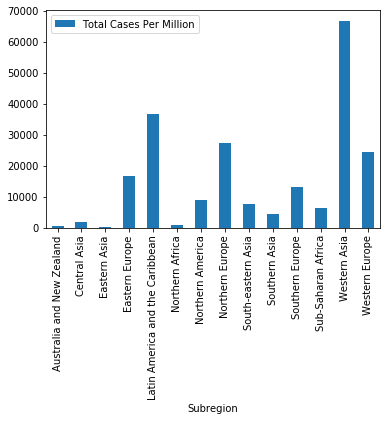

In [59]:
subregion_bar = df_new.plot.bar(x = 'Subregion', y = 'Total Cases Per Million')

In [60]:
## SAVE BAR PLOT
fig = subregion_bar.get_figure()
fig.savefig('output/SubregionBarPlot')

### Save to DB update 2

In [61]:
subregion_df.to_sql(name='merged_covid_happiness_table', con=engine, if_exists='append', index=True, index_label="COVID Ranking")